In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
url = 'https://raw.githubusercontent.com/zqktlwi4fecvo6ri/Statistics-and-Probability/Stable/winequality-red.csv'
df = pd.read_csv(url)
# Random sample
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
576,9.9,0.5,0.24,2.3,0.103,6.0,14.0,0.9978,3.34,0.52,10.0,4


In [4]:
df=df.rename(columns={'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
                    'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide',
                    'total sulfur dioxide':'Total Sulfur Dioxide','density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates',
                    'alcohol': 'Alcohol', 'quality': 'Quality'})
df

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual Sugar          0
Chlorides               0
Free Sulfur Dioxide     0
Total Sulfur Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

<AxesSubplot:>

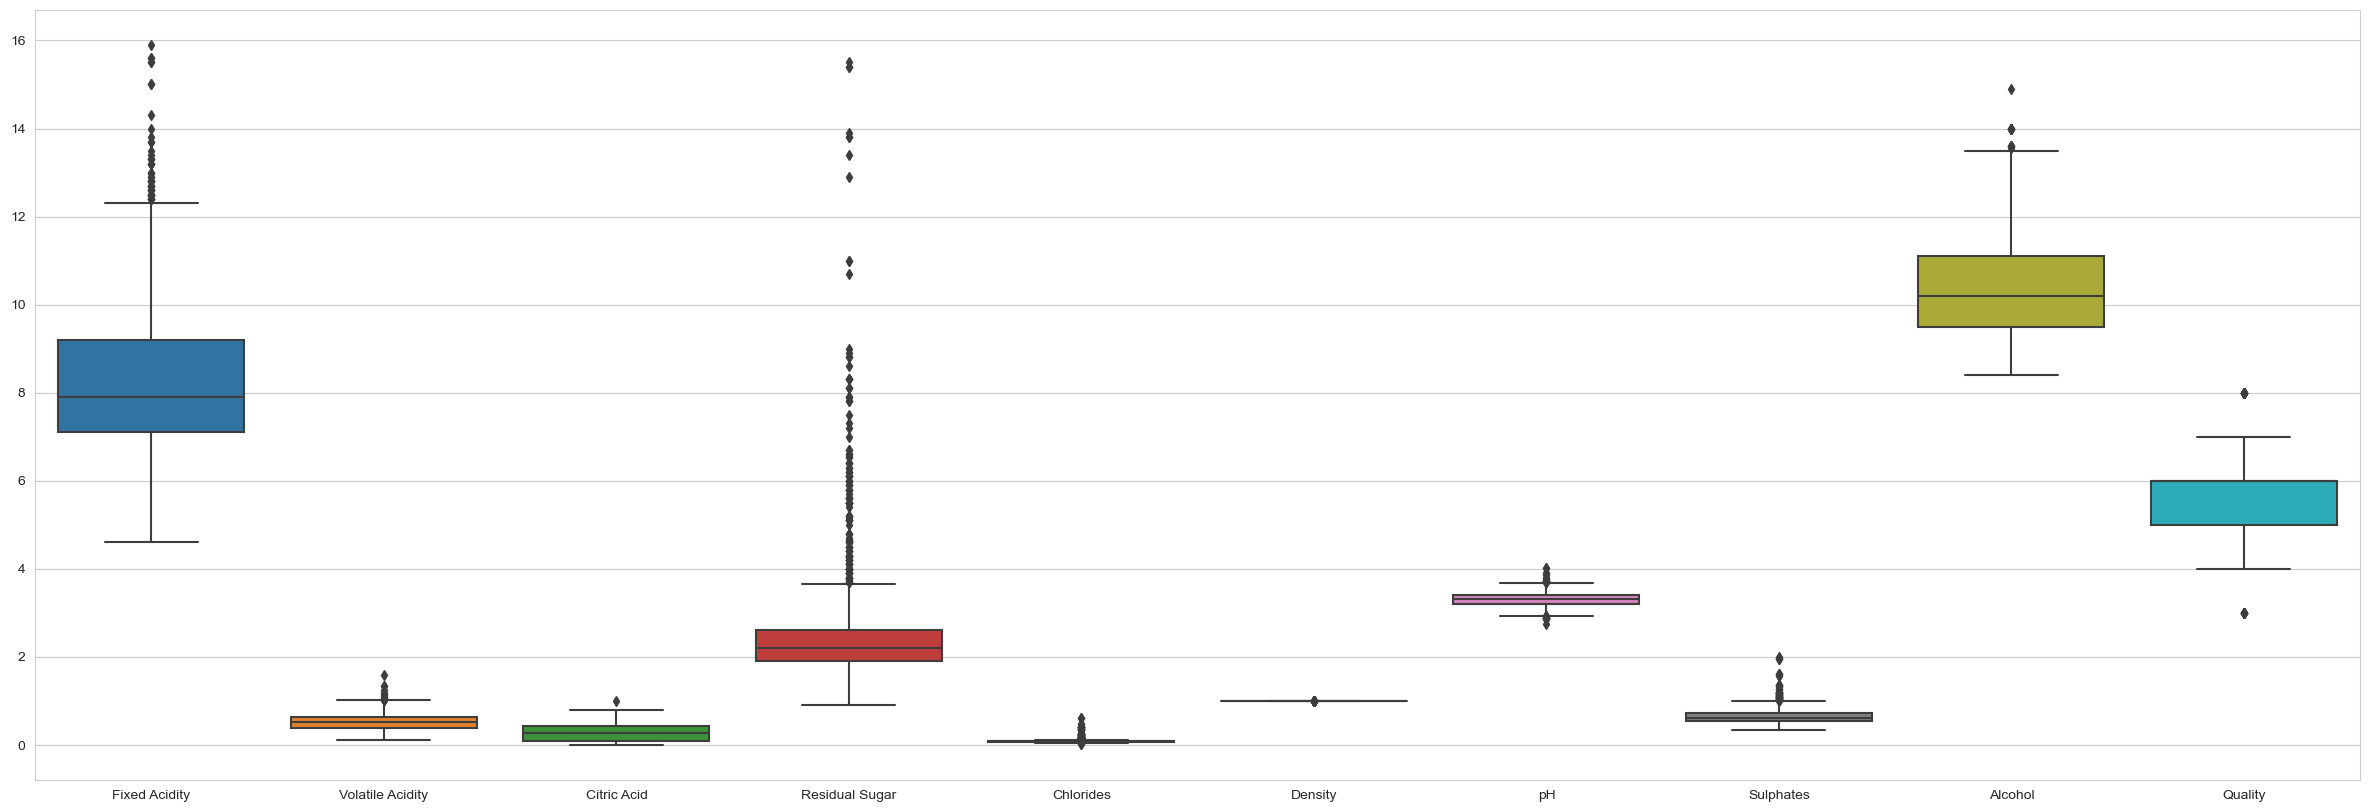

In [28]:
plt.figure(figsize=(30, 10))
zoom = df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Density',
           'pH', 'Sulphates', 'Alcohol', 'Quality']]
sns.boxplot(data=zoom)

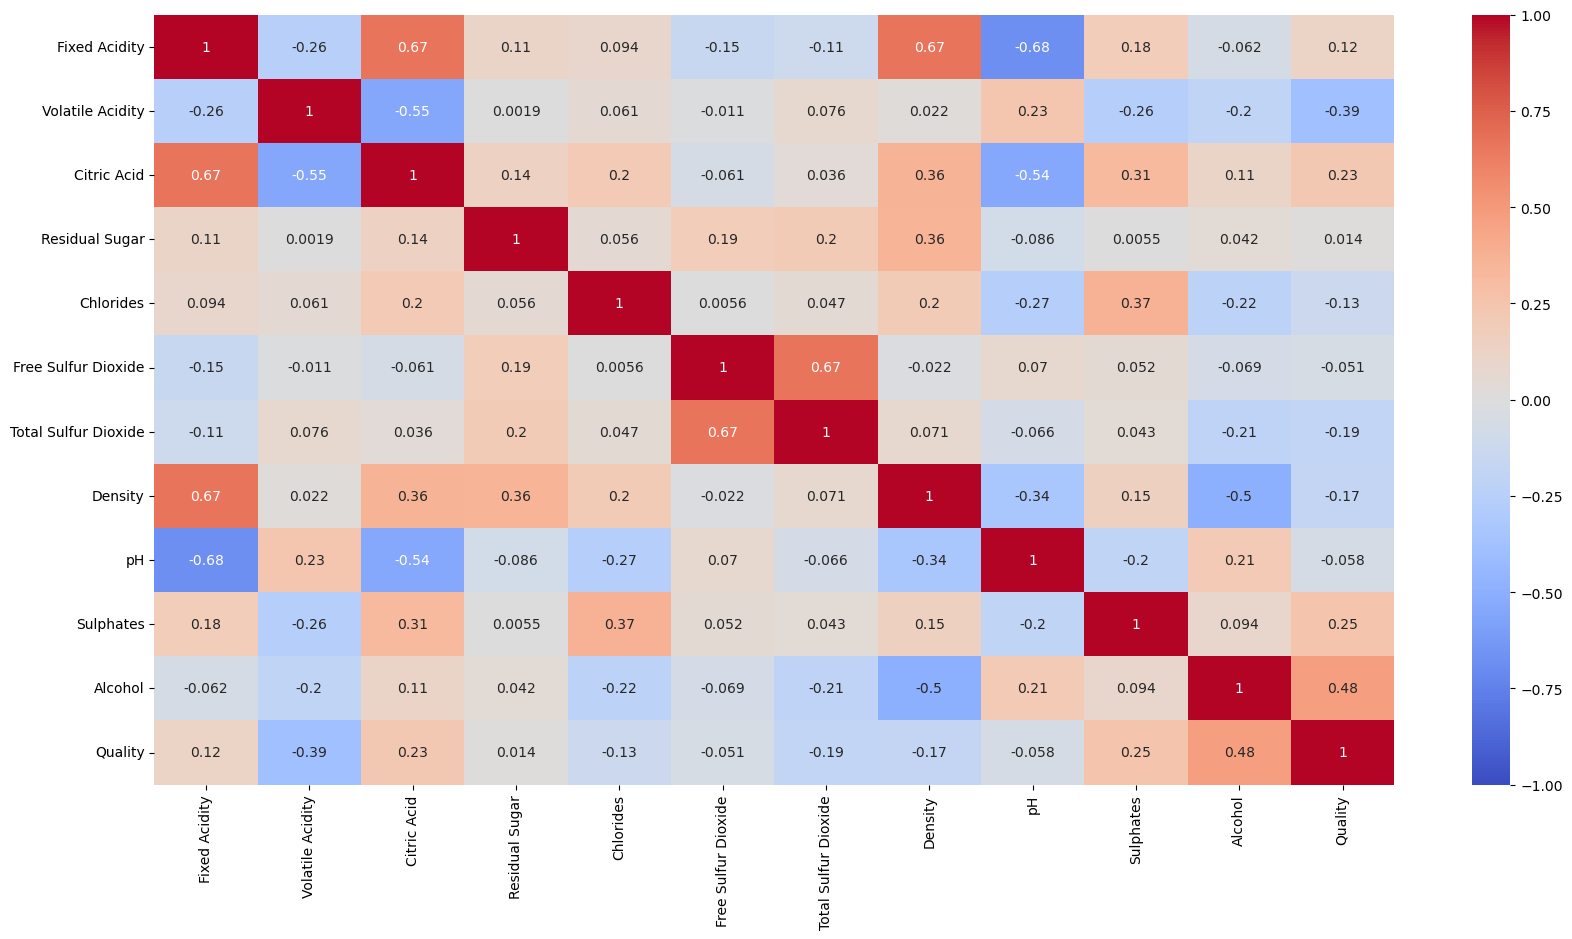

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

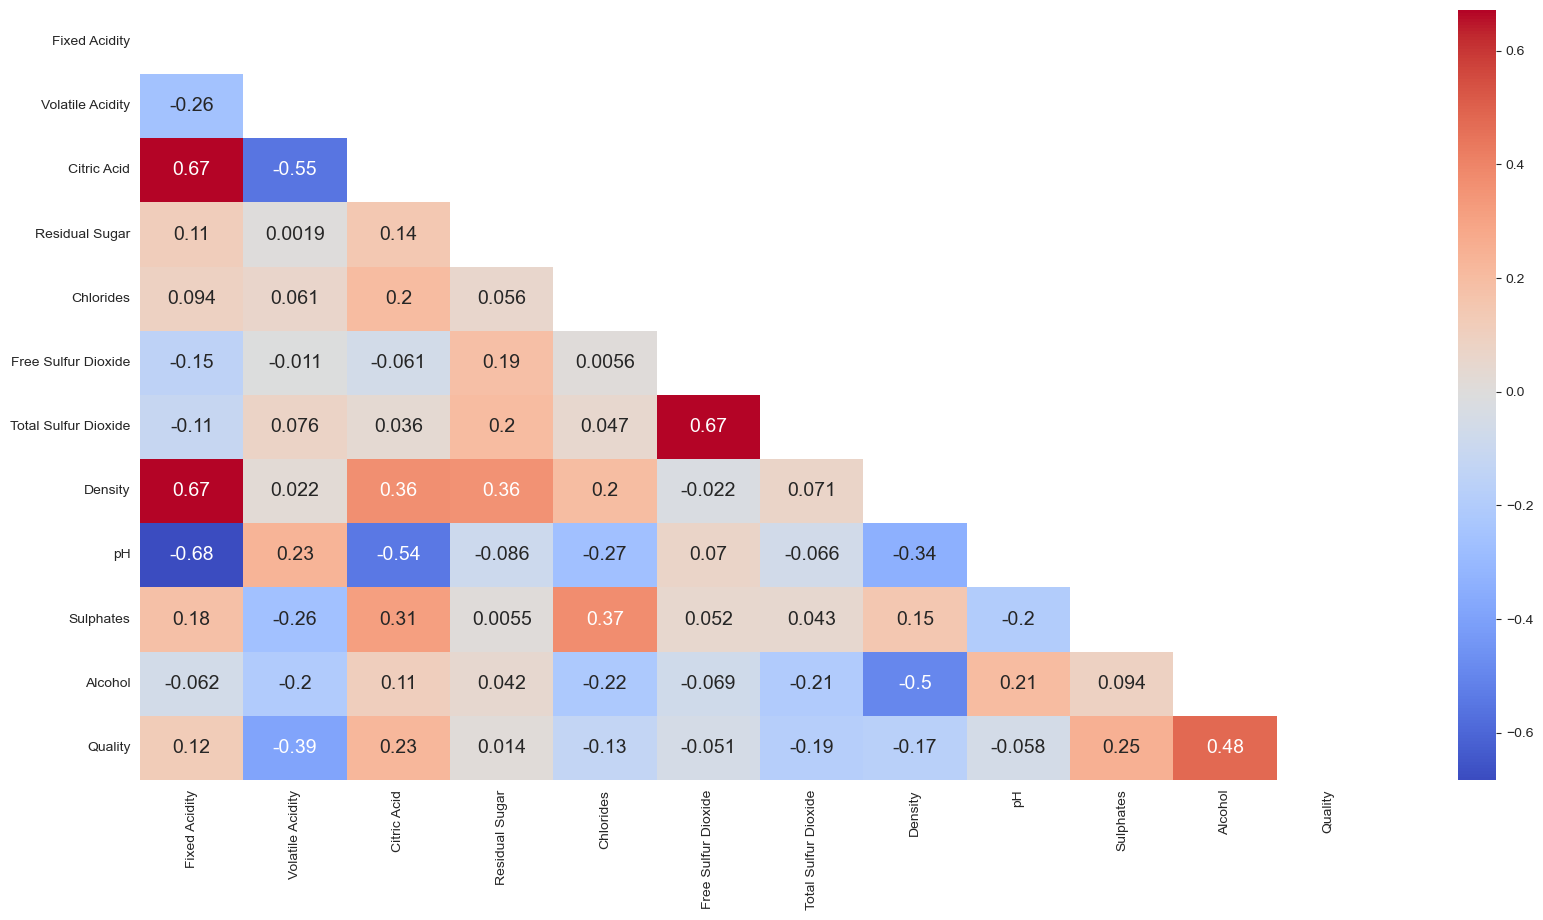

In [13]:
# Heatmap other display
# Creates an array of zeros
zero = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(zero)
zero[triangle_indices] = True
# Check the relationship between all the features with the target (Quality)
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), mask=zero, cmap="coolwarm", annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# In order of highest correlation (to Quality): Alcohol, Volatile Acidity, Sulphates, Citric Acid, 
    #Total Sulfur Dioxide, Density, Chlorides, Fixed

In [16]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# Splitting dataset into training set & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
     
# Fitting Multiple Linear Regression to the training set
regr = LinearRegression()
regr.fit(x_train, y_train)     

LinearRegression()

In [21]:
predictions = regr.predict(x_test)

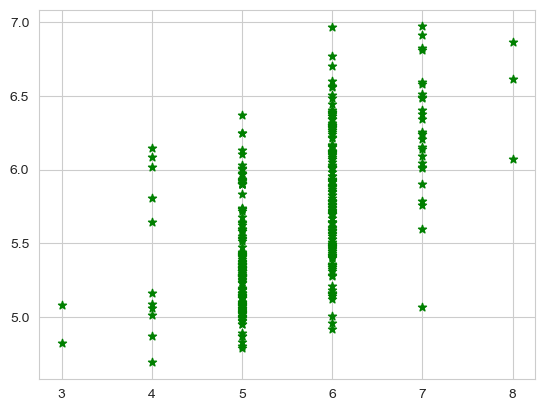

In [23]:
plt.scatter(y_test,predictions,color="green",marker="*")

In [17]:
'''Test prediction (From Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, 
    Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol)'''
print(regr.predict([[15, 0.01, 0, 5, 0.001, 30, 50, 0.95, 3, 0.9, 15]]))
# Quality: 9.82988592 (9 out of 10)

[9.82988592]


In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2:",metrics.r2_score(y_test,predictions))

MAE: 0.46963309286611066
MSE: 0.3844711978201245
RMSE: 0.6200574149384269
R2: 0.32838876395802197
